1. pick a kernel (polynomial, sigmoid, rbf)
2. construct the normalized kernel matrix of the data(dimensionn: m by m)
3. solve an eigenvalue problem 
4. for any data point(new or old), we can represent it as linear combination form.

In [2]:
from sklearn.datasets import load_iris

In [3]:
import pandas as pd 
import numpy as np 

In [4]:
iris = load_iris()

In [91]:
df = pd.DataFrame(iris.data, columns=[iris.feature_names])
df['target'] = iris.target

In [92]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [67]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [68]:
def kernel_matrix(x, kernel=None, d=3, sigma=None, C=1.0):
    n = x.shape[0] # n == 데이터의 갯수 
    if sigma is None:
        sigma = 1.0/n
    
    xxt = x.dot(x.T)
    
    if kernel == 'polynomial':
        return (C + xxt)**d
    elif kernel == 'sigmoid':
        return np.tanh(sigma*xxt + C)
    elif kernel == 'rbf':
        A = x.dot(x.T)
        B = np.repeat(np.diag(xxt), n).reshape(n,n)
        return np.exp(-(B.T - 2*A + B)/(2*sigma**2))
    else:
        pass 

In [69]:
K = kernel_matrix(X, kernel='polynomial', sigma = 0.2)
print("\n K.shape -->\n", K.shape) # there are 150 samples 
print("\n K --> \n", K)


 K.shape -->
 (150, 150)

 K --> 
 [[ 70240.512376  57022.169049  55002.062627 ... 143301.984337
  145034.127064 118298.461429]
 [ 57022.169049  46694.890801  44701.078149 ... 121508.031177
  122023.936     99961.946721]
 [ 55002.062627  44701.078149  43095.878216 ... 112748.588191
  114084.125     93082.856768]
 ...
 [143301.984337 121508.031177 112748.588191 ... 577801.395289
  596522.410632 483182.234423]
 [145034.127064 122023.936    114084.125    ... 596522.410632
  623930.478625 501701.826536]
 [118298.461429  99961.946721  93082.856768 ... 483182.234423
  501701.826536 406210.479416]]


In [42]:
# 정규화된 커널을 구하는 과정 
# 원본 공간에서 데이터가 표준화 되어 있다는 것은 커널 공간에서 데이터가 표준화 되어 있다는 것은 아니다.
# 따라서 커널공간에서 데이터를 표준화 시키는 Gram 행렬을 구해서 eigenvalue decomposition 해준다. 

In [43]:
n = K.shape[0]
one_mat = np.repeat(1/n, n**2).reshape(n, n)
# gram 은 정규화된 데이터를 가지고 있음. 
gram = K - one_mat.dot(K) - K.dot(one_mat) + one_mat.dot(K).dot(one_mat)

eigen_vals, eigen_vecs = np.linalg.eigh(gram)

print("eigen_values  --> \n", eigen_vals)
print("eigen_vectors --> \n", eigen_vecs)

eigen_values  --> 
 [-7.91152836e-09 -2.65424910e-09 -2.16151500e-09 -2.03645318e-09
 -1.84950036e-09 -1.76348373e-09 -1.64564999e-09 -1.57529130e-09
 -1.40098766e-09 -1.31229963e-09 -1.21093730e-09 -1.13710670e-09
 -1.05035583e-09 -1.02917921e-09 -9.76515350e-10 -9.51409143e-10
 -9.30924131e-10 -9.24714567e-10 -8.86239020e-10 -8.29195044e-10
 -8.05518818e-10 -7.60163682e-10 -7.19435125e-10 -6.71646467e-10
 -5.99796056e-10 -5.91290020e-10 -5.71779365e-10 -5.69561484e-10
 -5.38728578e-10 -5.29709768e-10 -4.67095295e-10 -4.52181168e-10
 -4.41989484e-10 -4.08102889e-10 -3.67053416e-10 -3.56428984e-10
 -3.48455142e-10 -3.01505753e-10 -2.76060286e-10 -2.71665697e-10
 -2.59827889e-10 -2.58811543e-10 -2.28797406e-10 -2.26948752e-10
 -2.26432576e-10 -2.10264775e-10 -1.90645076e-10 -1.76790972e-10
 -1.74590427e-10 -1.62004398e-10 -1.61941355e-10 -1.44200449e-10
 -1.07426105e-10 -9.75058673e-11 -6.75859948e-11 -6.24257770e-11
 -3.88840689e-11 -3.81483017e-11 -3.58942979e-11 -2.90796054e-11
 -2.2

In [158]:
gram.shape

(150, 150)

In [45]:
print("eigen_vals.shape --> \n", eigen_vals.shape)
print("eigen_vecs.shape --> \n", eigen_vecs.shape)

eigen_vals.shape --> 
 (150,)
eigen_vecs.shape --> 
 (150, 150)


In [46]:
# eigenvector 는 column 벡터 형태로 저장 되어 있다. 따라서 i 번째 eigen_vector 는 eigen_vecs[:, i] 이와 같이 구해준다. 
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key = lambda x: x[0], reverse=True)

In [110]:
eigen_pairs = np.array(eigen_pairs)

<ipython-input-110-d2e0ed44bdfb>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  eigen_pairs = np.array(eigen_pairs)


In [112]:
eigen_pairs.shape

(150, 2)

In [113]:
# compare my 'eigenvalue' and 'eigenvector' with scikit-learn Kernel PCA 
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=3, kernel='poly')
kpca.fit(X)

KernelPCA(kernel='poly', n_components=3)

In [130]:
# sklearn 을 통하여 eigenvector 추출 
kpca_eigen_vecs = kpca.alphas_ 

# 직접 구현한 것으로 eigenvector 추출 
# eigen_pairs[x번째][0] --> x 번째 eigenvalue 
# eigen_pairs[x번째][1] --> x 번째 eigenvector 
# np.vstack 은 밑에다가 하나씩 붙임. Transpose 하기전 eigen_vecs_for_comparision.shape --> (3 X 150)
# 이므로 transpose 를 하여 kpca_eigen_vecs 와 같은 형태로 만들어준다. 
eigen_vecs_for_comparision = np.vstack([eigen_pairs[0][1], eigen_pairs[1][1], eigen_pairs[2][1]]).T

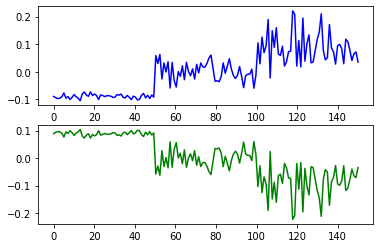

In [131]:
import matplotlib.pyplot as plt 
%matplotlib inline 

x = np.linspace(0, 150, 150)

plt.subplot(2,1,1)
plt.plot(x, kpca_eigen_vecs[:, 0], c='b')
plt.subplot(2,1,2)
plt.plot(x, eigen_vecs_for_comparision[:, 0], c='g')
plt.show()

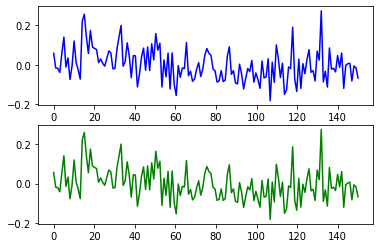

In [132]:
plt.subplot(2,1,1)
plt.plot(x, kpca_eigen_vecs[:, 1], c='b')
plt.subplot(2,1,2)
plt.plot(x, eigen_vecs_for_comparision[:, 1], c='g')
plt.show()

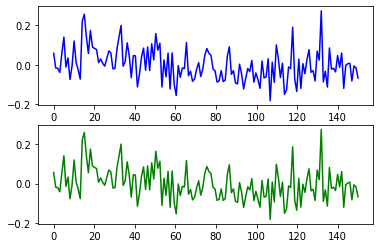

In [133]:
plt.subplot(2,1,1)
plt.plot(x, kpca_eigen_vecs[:, 1], c='b')
plt.subplot(2,1,2)
plt.plot(x, eigen_vecs_for_comparision[:, 1], c='g')
plt.show()

In [179]:
# eigen-value decomposition 에서 구한 eigen-vector 와 위에서 구한 정규화된 커널 (gram) 을 사용하면 
# feature space 에 mapping 된 데이터 포인트를 구할수 있다. 

In [190]:
# 우리는 데이터를 2차원에 표시할 것이기 때문에 component 의 숫자를 2로 설정해준다. 
n_components = 2

# 여기에다가 최종적으로 transformed 된 데이터를 담아줄 것이다. 
transformed_data = []
# n == 150 
for j in range(n):
    # 1행 2열의 0 행렬을 만들어준다. 
    loc=np.zeros(n_components)
    for k in range(n_components):
        inner_prod_sum = 0.
        # n == 150 
        for i in range(n): 
            # eigen_pairs[k][1][i] : k 번째로 큰 eigenvalue 에 해당하는 eigenvector 들과 
            # gram matrix 의 j 행 i 열을 곱해준다. 
            inner_prod_sum = inner_prod_sum + eigen_pairs[k][1][i] * gram[j, i]
        # 그 값을 다시 eigenvalue 로 나누어줌. 이렇게 해야 하는듯.
        loc[k] = inner_prod_sum/np.sqrt(eigen_pairs[k][0])
    
    # 1행 2열을 150번 해준다. 
    transformed_data.append(loc)

transformed_data = np.array(transformed_data)

In [191]:
# # 그냥 이렇게 해주면 되는데 이사람이 너무 복잡하게 한듯,,,
# # Kernel PCA 의 아이디어는 그냥 커널을 만들어서 커널 행렬의 eigenvector 와 eigenvalue 를 구해서 PCA 와 똑같이 해주면 된다. 
# eigen_val_top2 = np.vstack((eigen_pairs[0][1], eigen_pairs[1][1])).T
# Y = gram.dot(eigen_val_top2) 

In [192]:
transformed_data.shape

(150, 2)

In [193]:
iris_target = pd.DataFrame(data=iris.target, columns=['target'])

In [194]:
iris_target['target'].unique()

array([0, 1, 2])

In [195]:
label = iris_target['target'].unique()

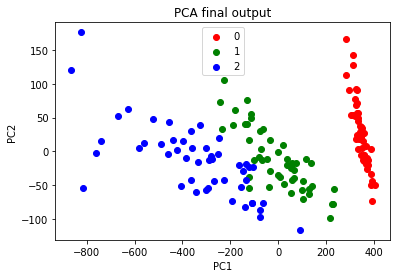

In [204]:
for c, l in zip('rgb', [0,1,2]):
    plt.scatter(transformed_data[y==l, 0], transformed_data[y==l, 1], c=c, label=l)
#         plt.scatter(Y[y==l, 0], Y[y==l, 1], c=c, label=l)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA final output')
plt.legend()
plt.show()

In [207]:
# Kernel PCA by using sklearn 
skl_kpca = KernelPCA(n_components=2, kernel='poly')
Y = skl_kpca.fit_transform(X)

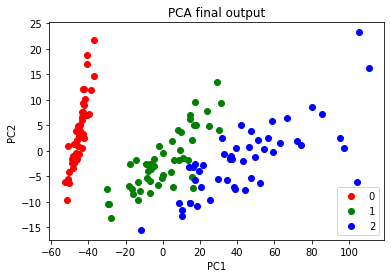

In [208]:
for c, l in zip('rgb', [0,1,2]):
    plt.scatter(Y[y==l, 0], Y[y==l, 1], c=c, label=l)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA final output')
plt.legend()
plt.show()